In [1]:
import numpy
# graphing parameters
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# forward-time/centered scheme
L = 1
nt = 100 #100 time steps
nx = 51 #51 points
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

In [5]:
def ftcs(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme
    
    Parameters:
    ----------
    T: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    T: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        
    return T

In [6]:
sigma = 1/2.0
dt = sigma * dx*dx/alpha
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

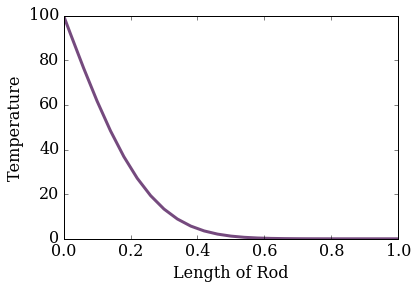

In [12]:
pyplot.plot(numpy.linspace(0,1,nx), T, color="#754A7E", ls="-", lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

## Boundary Conditions

In [10]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [13]:
nt = 1000
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

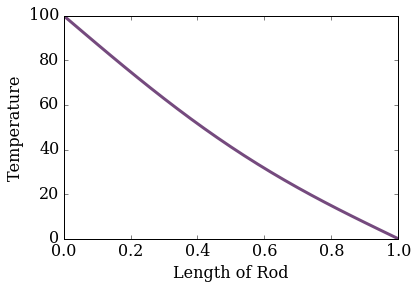

In [14]:
pyplot.plot(numpy.linspace(0,1,nx), T, color="#754A7E", ls="-", lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

In [20]:
def ftcs_mixed(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme using
    Dirichlet b.c. at left boundary and Neumann b.c. at right boundary
    
    Parameters:
    ----------
    T: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    T: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        T[-1] = T[-2]
        
    return T

In [21]:
nt = 1000
T = ftcs_mixed(Ti.copy(), nt, dt, dx, alpha)

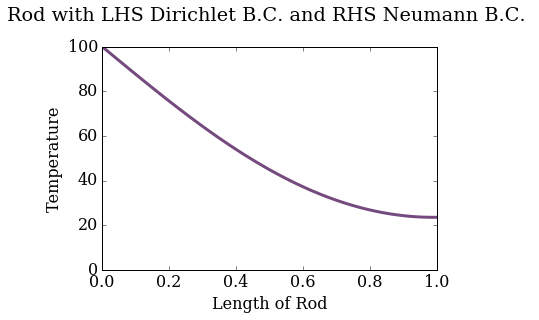

In [22]:
pyplot.plot(numpy.linspace(0,1,nx), T, color="#754A7E", ls="-", lw=3)
pyplot.ylim(0,100)
pyplot.title('Rod with LHS Dirichlet B.C. and RHS Neumann B.C. \n')
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');